<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_07/06_custom_regularization_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Imports
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [2]:
# Step 2: Load and Prepare Data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[..., tf.newaxis].astype("float32") / 255.0
x_test = x_test[..., tf.newaxis].astype("float32") / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Step 3: Define Custom Regularizer
class CustomL1L2(tf.keras.regularizers.Regularizer):
    def __init__(self, l1=0.01, l2=0.01):
        self.l1 = l1
        self.l2 = l2

    def __call__(self, x):
        return self.l1 * tf.reduce_sum(tf.abs(x)) + self.l2 * tf.reduce_sum(tf.square(x))

    def get_config(self):
        return {'l1': float(self.l1), 'l2': float(self.l2)}

In [4]:
# Step 4: Define Custom Dropout Layer
class CustomDropout(layers.Layer):
    def __init__(self, rate):
        super(CustomDropout, self).__init__()
        self.rate = rate

    def call(self, inputs, training=None):
        if training:
            return tf.nn.dropout(inputs, rate=self.rate)
        return inputs

In [5]:
# Step 5: Build Model with Custom Regularizer and Dropout
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=CustomL1L2(0.01, 0.01)),
    CustomDropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Step 6: Train and Evaluate
history = model.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat),
                    epochs=10, batch_size=64, verbose=0)

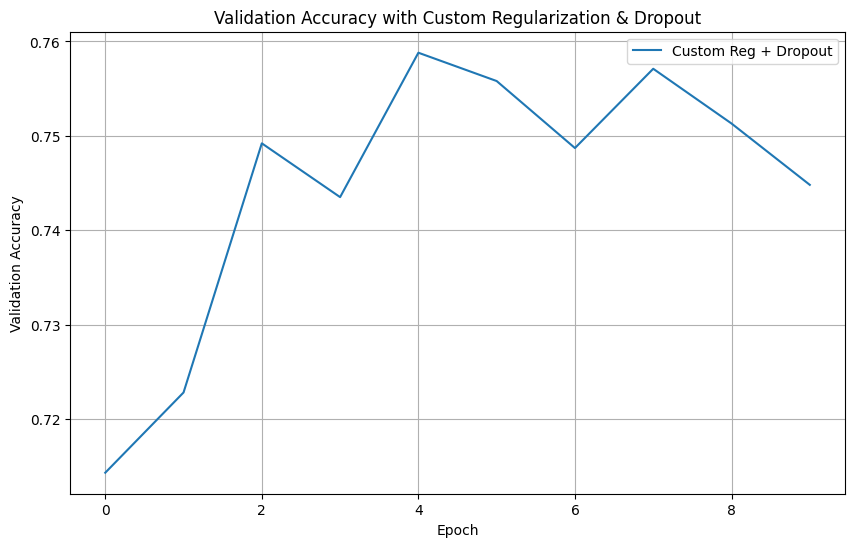

In [7]:
# Step 7: Plot Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['val_accuracy'], label='Custom Reg + Dropout')
plt.title("Validation Accuracy with Custom Regularization & Dropout")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()